In [15]:
import numpy as np
from collections import Counter
class KNN:
  def __init__(self, K):
    self.K = K

  def euclidean_distance(self, x1, x2): # points 1 and 2
    d = np.sqrt(np.sum((x1-x2)**2))
    return d

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  
  def _predict(self, x):
    # compute distance
    d = [self.euclidean_distance(x_train, x) for x_train in self.X_train]
    # get k nearest samples, labels
    k_indices = np.argsort(d)[:self.K]
    k_nearest_labels = [self.y_train[i] for i in k_indices] 
    # majority, most common
    label = Counter(k_nearest_labels).most_common(1)
    return label[0][0]
  
  def predict(self, X):
    labels = [self._predict(x) for x in X]
    return np.array(labels) 

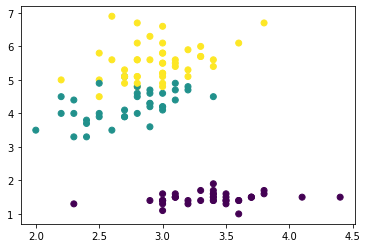

0.9666666666666667


In [22]:
# Load data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,y = load_iris(True)
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

# Visualize
plt.scatter(X_train[:,1], X_train[:,2], c= y_train)
plt.show()

# fit model
clf = KNN(K=9) # small k-> noise has effect more on result
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions == y_test)/len(y_test)
print(acc)